<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/1.b.%20Linear%20Regression_Boston%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report



In [ ]:
col_names=['crim', 'zn', 'indus', 'river', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'teacher', 'black', 'lower', 'value']
df = pd.read_csv('/content/drive/MyDrive/csv/housing.csv', names=col_names, header=None)

In [ ]:
df

,crim,zn,indus,river,nox,rm,age,dis,rad,tax,teacher,black,lower,value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.rad.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
river      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
teacher    0
black      0
lower      0
value      0
dtype: int64

In [ ]:
df.river.value_counts()

0    471
1     35
Name: river, dtype: int64

## 2. Data exploration

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


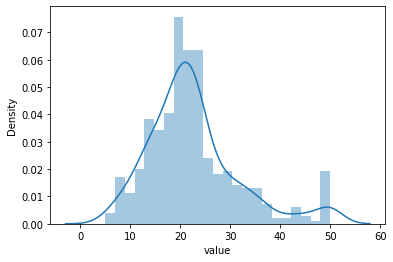

In [ ]:
sns.distplot(df.value)

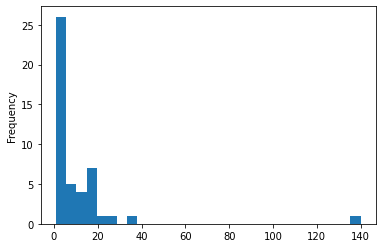

In [ ]:
df.teacher.value_counts().plot(kind="hist", bins=30)

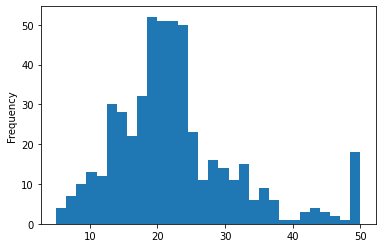

In [ ]:
df[df.teacher<40].value.plot(kind="hist", bins=30)

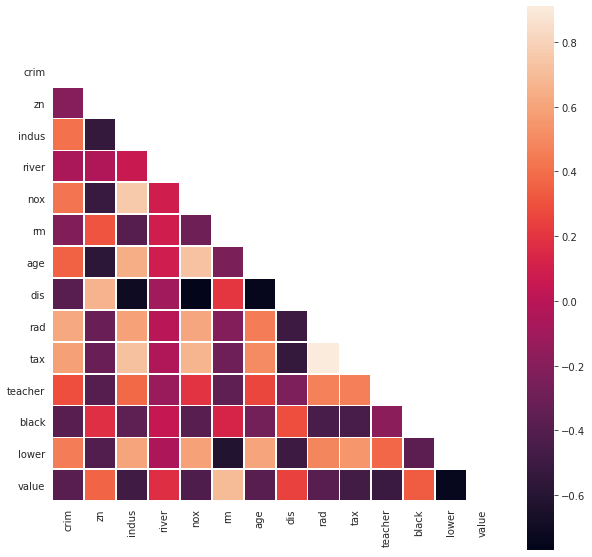

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8)

In [ ]:
corrmat=df.corr()
corrmat

,crim,zn,indus,river,nox,rm,age,dis,rad,tax,teacher,black,lower,value
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


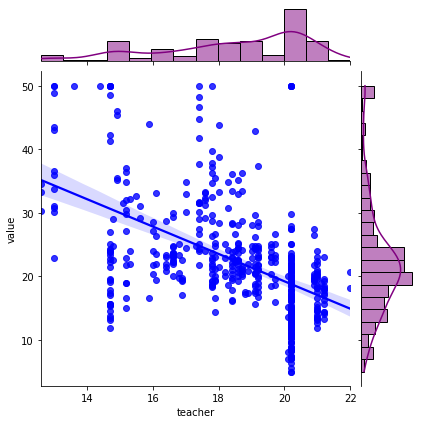

In [ ]:
sns.jointplot(x=df['teacher'],y=df['value'], joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")

As there are more students per teacher, the Median value drops.  We expect this as poor neighborhood has less # of teachers compared to more affluent neighborhood.

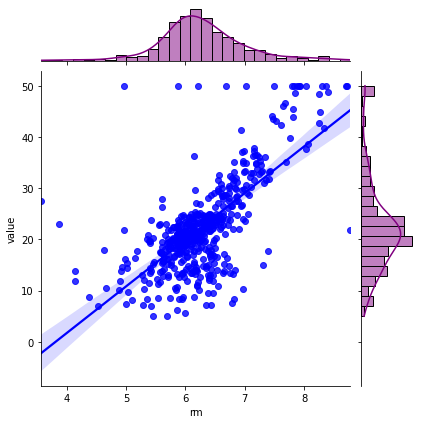

In [ ]:
sns.jointplot(x=df.rm,y=df.value, joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")

As expected, more rooms translate to more Median value to homes

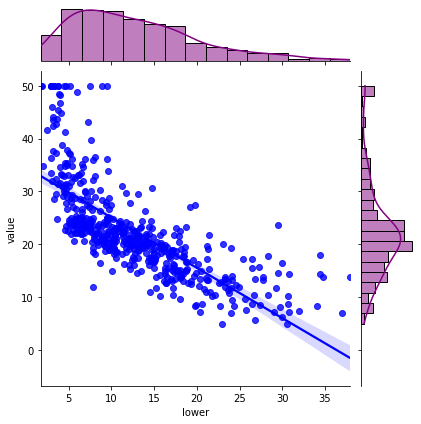

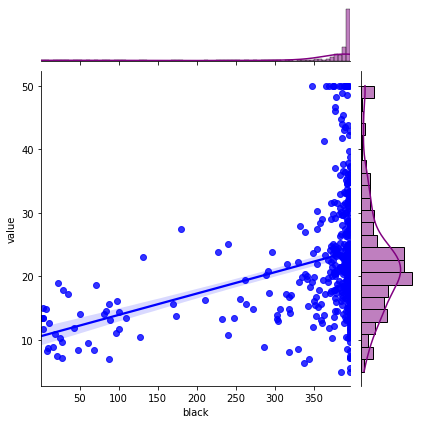

In [ ]:
sns.jointplot(x=df.lower,y=df.value, joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")
sns.jointplot(x=df.black,y=df.value, joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")

--The value of the housing is not correlated to the proportion of blacks by town


--As expected, the lower status of population is negatively correlated to the Medivan Value of the housing.

In [ ]:
from scipy import stats
corr= stats.pearsonr(x=df['lower'],y=df['value'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 5.081103394386392e-88
cor:		 -0.737662726174015


The negavtive correlation between value and lower status of hte population is pretty stark.  It is statistically significant!

In [ ]:
#Split Value as a Target value and drop river since there was little or no impact to value.
target = df.value
df2 = df.drop(['river', 'value'], axis = 1)
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(102, 12) (404, 12)
(102,) (404,)


In [ ]:
df2

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.7747884379580863
RMSE : 4.332990100922429


# The X variables (or attributes) are pretty accurate when predicting the Median value of the housing.  There was no significant impact of being a racial minority (in this case, black) when the property value is being assessed.  As expected the number of teachers was important as well as lower economic status.